## Problem 1

Load the dataset from data1.csv, decompose the dataset, check the residuals for stationarity.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg as la

In [2]:
df = pd.read_csv('data1.csv')
print(df.keys())

Index(['DATE', 'IPG2211A2N'], dtype='object')


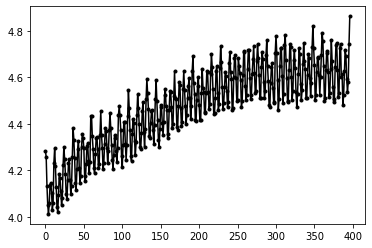

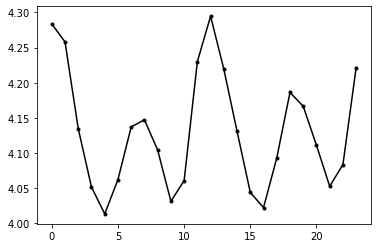

In [27]:
data = np.log(df['IPG2211A2N'].to_numpy())

plt.plot(np.arange(data.size), data, 'k.-')
plt.show()

plt.plot(np.arange(24), data[:24], 'k.-')
plt.show()

$A\theta = b$

$||A\theta - b||^2 \rightarrow \min$

$\theta = (A^TA)^{-1}A^Tb$

$y = f(x) = \theta_1x + \theta_0 = [x 1]^T*[\theta_1 \theta_0]$

$y = f(x) = \theta_2x^2 + \theta_1x + \theta_0 = [x^2 x 1]^T*[\theta_2 \theta_1 \theta_0]$

In [14]:
A = np.ones((data.size, 3))
A[:,0] = np.arange(data.size)**2
A[:,1] = np.arange(data.size)

b = data.copy()

AtA = A.T @ A
Atb = A.T @ b

theta = la.inv(AtA) @ Atb
print(theta)

[-2.69418974e-04  2.18449639e-01  5.96950393e+01]


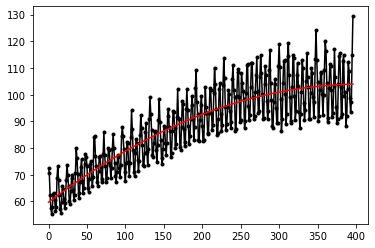

In [15]:
x = np.arange(data.size)
plt.plot(x, data, 'k.-')
plt.plot(x, theta[0]*x**2 + theta[1]*x + theta[2], 'r-')
plt.show()

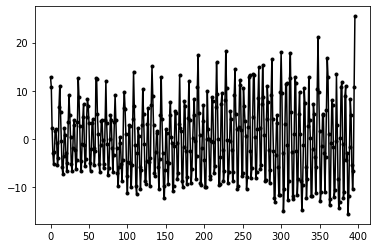

In [16]:
resid = data - (theta[0]*x**2 + theta[1]*x + theta[2])
plt.plot(x, resid, 'k.-')
plt.show()

$|T - 2n/3| > 1.96\sqrt{\frac{8n}{45}}$

In [19]:
turning_points = 0
for i in range(1, resid.size-1):
    if resid[i] > resid[i-1] and resid[i] > resid[i+1]:
        turning_points += 1
    if resid[i] < resid[i-1] and resid[i] < resid[i+1]:
        turning_points += 1

expected_points = 2*resid.size/3

print(np.abs(turning_points - expected_points))
print(1.96*np.sqrt(8*resid.size/45))

131.66666666666669
16.46607394344842


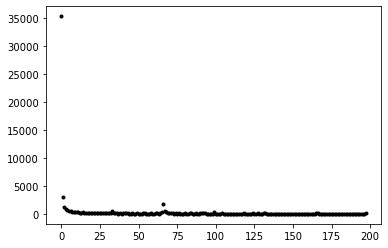

In [22]:
q = np.abs(np.fft.fft(data))
plt.plot(np.arange(q.size//2), q[:q.size//2], 'k.')
plt.show()


### Decomposing the data using TSA library

In [23]:
from statsmodels.tsa.seasonal import STL

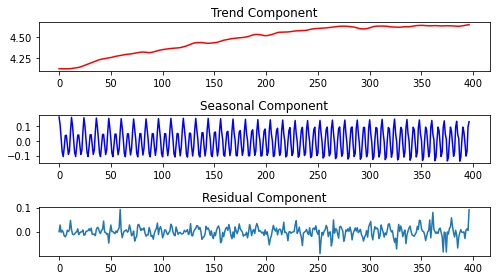

In [29]:
stl = STL(np.log(df['IPG2211A2N']), seasonal=13, period=12, robust=True) 
result = stl.fit()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 4))

ax1.plot(df.index, result.trend, label='Trend', color='red')
ax1.set_title('Trend Component')
ax2.plot(df.index, result.seasonal, label='Seasonal', color='blue')
ax2.set_title('Seasonal Component')
ax3.plot(df.index, result.resid, label='Residual')
ax3.set_title('Residual Component')
plt.tight_layout()
plt.show()

In [31]:
turning_points = 0
resid = result.resid
for i in range(1, resid.size-1):
    if resid[i] > resid[i-1] and resid[i] > resid[i+1]:
        turning_points += 1
    if resid[i] < resid[i-1] and resid[i] < resid[i+1]:
        turning_points += 1

# turning_ratio = turning_points/(resid.size-2)
expected_points = 2*resid.size/3

print(np.abs(turning_points - expected_points))
print(1.96*np.sqrt(8*resid.size/45))

52.666666666666686
16.46607394344842


## Problem 2

Load the dataset from data2.csv, decompose the dataset, check the residuals for stationarity.